# Numerical accuracy

> Philipp Schlatter <br />
  pschlatt@mech.kth.se <br />
  SimEx/FLOW, KTH Engineering Mechanics, Royal Institute of Technology, Stockholm, Sweden

> This notebook is a part of the [KTH-Nek5000 lecture notes](https://kth-nek5000.github.io/kthNekBook/).

In [1]:
import numpy as np
from math import pi
from numpy.linalg import norm
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
params = {'legend.fontsize': 15,
          'legend.loc':'best',
          'figure.figsize': (14,5),
          'lines.markerfacecolor':'none',
         'axes.labelsize': 17,
         'axes.titlesize': 17,
         'xtick.labelsize':15,
         'ytick.labelsize':15,
         'grid.alpha':0.6}
pylab.rcParams.update(params)
#%matplotlib notebook
%matplotlib inline

## Machine epsilon

All numbers in a computer need to be stored in the computer’s memory. The main distinction is between integer and floating-point numbers, where integers are represented exactly (within in certain range), and floating-point numbers are approximated with an average relative error of $\varepsilon_m$ called machine epsilon. Three different ways to compute the machine epsilon $\varepsilon_m$:

In [2]:
# using the typical algorithm: divide by two until there is no difference any longer
def machineEpsilon(func=float):
    machine_epsilon = func(1)
    while func(1)+func(machine_epsilon) != func(1):
        machine_epsilon_last = machine_epsilon
        machine_epsilon = func(machine_epsilon) / func(2)
    return machine_epsilon_last
machineEpsilon(float)

2.220446049250313e-16

In [3]:
# using finfo
np.finfo(float).eps

2.220446049250313e-16

In [4]:
# using the definition of the bit size of the mantissa (for float nmant=52)
2**-np.finfo(float).nmant, 2**-52

(2.220446049250313e-16, 2.220446049250313e-16)

## Accuracy of derivatives

In the following, we compute a derivative of a known function using standard finite difference methods. We will consider the function
$$\sin(2x) \exp(-x^2/20)\, ,$$

and employ first and second-order finite-difference formulas using double-precision arithmetics. 
We can then compare different types of errors in the computation of derivatives (truncation error and round-off error), and provide a simple model based on error propagation to estimate the optimal grid spacing as $\Delta x^{(1/2)}$ for first-order methods and  $\Delta x^{(1/3)}$ for second-order methods.

Are there ways to avoid round-off errors? Realising that the problem comes from taking a difference of two numbers of nearly the same size, one could try to formulate a derivative without taking a difference. One such approach is the complex-step algorithm, which computes derivatives up to machine precision,

$$f'(x) \approx \textrm{Im}[f(x+i\Delta x)]/\Delta x \, .$$

In [5]:
# Analytical f(x) and f'(x)
f = lambda  x: np.sin(2*x)*np.exp(-x**2/20)
fp = lambda x: 2*np.cos(2*x)*np.exp(-x**2/20)-(2/20)*x*f(x)

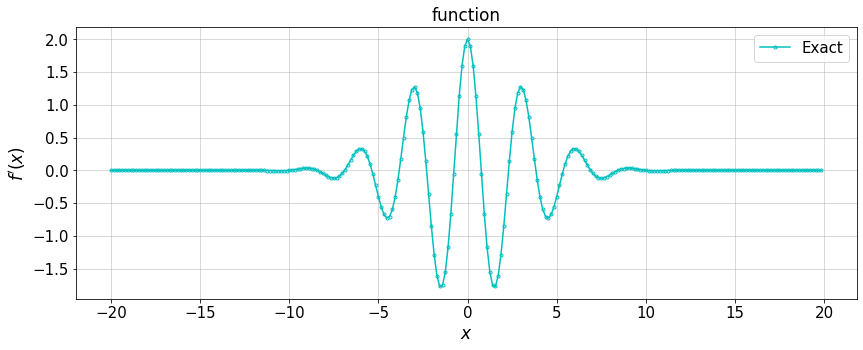

In [6]:
i=8
L=40
n=int(2**i)
  
#create data
dx=L/n    
x=np.linspace(-L/2,L/2-dx,n)

    
fx=f(x)
fpx=fp(x)

#plot    
plt.figure(figsize=(14,5))
plt.title('function')
plt.plot(x,fpx,'.-c',label='Exact')
plt.xlabel(r'$x$')
plt.ylabel(r'$f^\prime(x)$')
plt.grid()
plt.legend(loc='upper right')
plt.show()

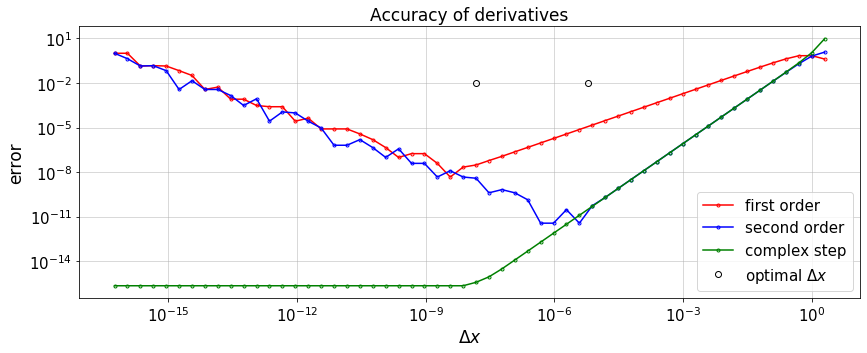

In [7]:
x=1.
DX=[]
E1=[]
E2=[]
E3=[]
for i in range(-54,2):
   dx = 2**i

   df1 = (f(x+dx)-f(x))/dx
   e1 = abs(df1-fp(x))/abs(fp(x))
   E1.append(e1)
    
   df2 = (f(x+dx)-f(x-dx))/2/dx
   e2 = abs(df2-fp(x))/abs(fp(x))
   E2.append(e2)

   df3 = np.imag(f(x+1j*dx))/dx
   e3 = abs(df3-fp(x))/abs(fp(x))
   e3 = max (e3,np.finfo(float).eps)
   E3.append(e3)

   DX.append(dx)

#plot    
plt.figure(figsize=(14,5))
plt.title('Accuracy of derivatives')
plt.loglog(DX,E1,'.-r',label='first order')
plt.loglog(DX,E2,'.-b',label='second order')
plt.loglog(DX,E3,'.-g',label='complex step')
plt.plot((2**-52)**(1/2),0.01,'ok',label="optimal $\Delta x$")
plt.plot((2**-52)**(1/3),0.01,'ok')
plt.xlabel('$\Delta x$')
plt.ylabel('error')
plt.grid()
plt.legend(loc='lower right')
plt.show()
